In [25]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [26]:
from pandas import read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

In [27]:
dataframe = read_csv('/content/drive/MyDrive/Colab Notebooks/Wind-Speed-Prediction-using-Time-Series-Analysis-master/Wind_Data_10_daily.csv',
header=0, sep=";", squeeze=True, parse_dates=True)
dataframe

<ipython-input-27-6eb9d530f112>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataframe = read_csv('/content/drive/MyDrive/Colab Notebooks/Wind-Speed-Prediction-using-Time-Series-Analysis-master/Wind_Data_10_daily.csv',


,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
...,...,...,...,...,...,...,...,...,...
3647,2010,12,27,0,0,17.68,126.49,32.73,7.29
3648,2010,12,28,0,0,10.53,113.30,15.28,6.13
3649,2010,12,29,0,0,7.74,102.95,13.14,1.30
3650,2010,12,30,0,0,8.01,89.82,18.25,1.84


In [28]:
dataframe = dataframe[0:300]
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
...,...,...,...,...,...,...,...,...,...
295,2001,10,23,0,0,3.86,190.99,6.60,0.51
296,2001,10,24,0,0,8.27,240.42,11.36,5.78
297,2001,10,25,0,0,7.24,232.82,12.00,1.91
298,2001,10,26,0,0,4.05,128.90,5.18,2.71


In [29]:
dataframe = dataframe.drop('Wind Direction daily mean', 1)
dataframe = dataframe.drop('Wind Speed daily max', 1)
dataframe = dataframe.drop('Wind Speed daily min', 1)
dataframe = dataframe.drop('Minute', 1)
dataframe = dataframe.drop('Year', 1)
dataframe = dataframe.drop('Month', 1)
dataframe = dataframe.drop('Day', 1)
dataframe = dataframe.drop('Hour', 1)


dataframe


dataset = dataframe.values
dataset.shape

<ipython-input-29-5a4cc52ed087>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Direction daily mean', 1)
<ipython-input-29-5a4cc52ed087>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Speed daily max', 1)
<ipython-input-29-5a4cc52ed087>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Speed daily min', 1)
<ipython-input-29-5a4cc52ed087>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Minute', 1)
<ipython-input-29-5a4cc52ed087>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop excep

(300, 1)

In [30]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

201 99


In [31]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [33]:
len(testX)

97

# Multilayer Perceptron Model

In [34]:
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

In [35]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
100/100 - 1s - loss: 240.8657 - 1s/epoch - 10ms/step
Epoch 2/200
100/100 - 0s - loss: 164.6864 - 234ms/epoch - 2ms/step
Epoch 3/200
100/100 - 0s - loss: 110.8213 - 227ms/epoch - 2ms/step
Epoch 4/200
100/100 - 0s - loss: 76.4602 - 219ms/epoch - 2ms/step
Epoch 5/200
100/100 - 0s - loss: 56.4809 - 234ms/epoch - 2ms/step
Epoch 6/200
100/100 - 0s - loss: 46.8311 - 242ms/epoch - 2ms/step
Epoch 7/200
100/100 - 0s - loss: 42.9343 - 222ms/epoch - 2ms/step
Epoch 8/200
100/100 - 0s - loss: 41.5690 - 334ms/epoch - 3ms/step
Epoch 9/200
100/100 - 0s - loss: 41.0778 - 361ms/epoch - 4ms/step
Epoch 10/200
100/100 - 0s - loss: 40.8578 - 392ms/epoch - 4ms/step
Epoch 11/200
100/100 - 1s - loss: 40.7024 - 590ms/epoch - 6ms/step
Epoch 12/200
100/100 - 0s - loss: 40.6431 - 468ms/epoch - 5ms/step
Epoch 13/200
100/100 - 0s - loss: 40.4172 - 466ms/epoch - 5ms/step
Epoch 14/200
100/100 - 1s - loss: 40.1670 - 531ms/epoch - 5ms/step
Epoch 15/200
100/100 - 1s - loss: 40.0062 - 599ms/epoch - 6ms/step
Epo

In [36]:
import math
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 34.18 MSE (5.85 RMSE)
Test Score: 15.93 MSE (3.99 RMSE)


4/4 [==============================] - 0s 2ms/step


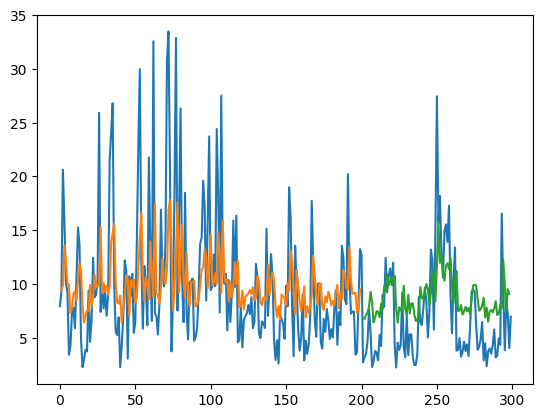

In [37]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM

In [38]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [41]:
dataframe = read_csv('/content/drive/MyDrive/Colab Notebooks/Wind-Speed-Prediction-using-Time-Series-Analysis-master/Wind_Data_10_daily.csv',
header=0, sep=";", squeeze=True, parse_dates=True)
dataframe

<ipython-input-41-6eb9d530f112>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataframe = read_csv('/content/drive/MyDrive/Colab Notebooks/Wind-Speed-Prediction-using-Time-Series-Analysis-master/Wind_Data_10_daily.csv',


,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
...,...,...,...,...,...,...,...,...,...
3647,2010,12,27,0,0,17.68,126.49,32.73,7.29
3648,2010,12,28,0,0,10.53,113.30,15.28,6.13
3649,2010,12,29,0,0,7.74,102.95,13.14,1.30
3650,2010,12,30,0,0,8.01,89.82,18.25,1.84


In [42]:
dataframe = dataframe[0:300]
dataframe

,Year,Month,Day,Hour,Minute,Wind Speed daily mean,Wind Direction daily mean,Wind Speed daily max,Wind Speed daily min
0,2001,1,1,0,0,7.96,140.21,9.80,5.71
1,2001,1,2,0,0,9.29,144.55,20.59,5.18
2,2001,1,3,0,0,20.63,209.30,32.88,7.23
3,2001,1,4,0,0,15.79,190.95,27.13,7.27
4,2001,1,5,0,0,10.03,166.59,14.02,7.85
...,...,...,...,...,...,...,...,...,...
295,2001,10,23,0,0,3.86,190.99,6.60,0.51
296,2001,10,24,0,0,8.27,240.42,11.36,5.78
297,2001,10,25,0,0,7.24,232.82,12.00,1.91
298,2001,10,26,0,0,4.05,128.90,5.18,2.71


In [43]:
dataframe = dataframe.drop('Wind Direction daily mean', 1)
dataframe = dataframe.drop('Wind Speed daily max', 1)
dataframe = dataframe.drop('Wind Speed daily min', 1)
dataframe = dataframe.drop('Minute', 1)
dataframe = dataframe.drop('Year', 1)
dataframe = dataframe.drop('Month', 1)
dataframe = dataframe.drop('Day', 1)
dataframe = dataframe.drop('Hour', 1)


dataframe

<ipython-input-43-75659d6497b1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Direction daily mean', 1)
<ipython-input-43-75659d6497b1>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Speed daily max', 1)
<ipython-input-43-75659d6497b1>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Wind Speed daily min', 1)
<ipython-input-43-75659d6497b1>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe = dataframe.drop('Minute', 1)
<ipython-input-43-75659d6497b1>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop excep

,Wind Speed daily mean
0,7.96
1,9.29
2,20.63
3,15.79
4,10.03
...,...
295,3.86
296,8.27
297,7.24
298,4.05


In [44]:
dataset = dataframe.values
dataset.shape

(300, 1)

In [45]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [46]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

201 99


In [47]:
import numpy as np
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [48]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [49]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [50]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
199/199 - 7s - loss: 0.0478 - 7s/epoch - 38ms/step
Epoch 2/100
199/199 - 1s - loss: 0.0367 - 562ms/epoch - 3ms/step
Epoch 3/100
199/199 - 1s - loss: 0.0363 - 528ms/epoch - 3ms/step
Epoch 4/100
199/199 - 1s - loss: 0.0361 - 543ms/epoch - 3ms/step
Epoch 5/100
199/199 - 1s - loss: 0.0361 - 517ms/epoch - 3ms/step
Epoch 6/100
199/199 - 1s - loss: 0.0361 - 547ms/epoch - 3ms/step
Epoch 7/100
199/199 - 1s - loss: 0.0361 - 539ms/epoch - 3ms/step
Epoch 8/100
199/199 - 1s - loss: 0.0362 - 543ms/epoch - 3ms/step
Epoch 9/100
199/199 - 1s - loss: 0.0360 - 538ms/epoch - 3ms/step
Epoch 10/100
199/199 - 1s - loss: 0.0361 - 523ms/epoch - 3ms/step
Epoch 11/100
199/199 - 1s - loss: 0.0360 - 541ms/epoch - 3ms/step
Epoch 12/100
199/199 - 1s - loss: 0.0360 - 539ms/epoch - 3ms/step
Epoch 13/100
199/199 - 1s - loss: 0.0361 - 563ms/epoch - 3ms/step
Epoch 14/100
199/199 - 1s - loss: 0.0361 - 532ms/epoch - 3ms/step
Epoch 15/100
199/199 - 1s - loss: 0.0360 - 715ms/epoch - 4ms/step
Epoch 16/100
199/199 

In [51]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# calculate mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))

4/4 [==============================] - 0s 3ms/step
Train Score: 5.86 RMSE
Test Score: 4.02 RMSE
Train Score: 4.22 MAE
Test Score: 3.37 MAE


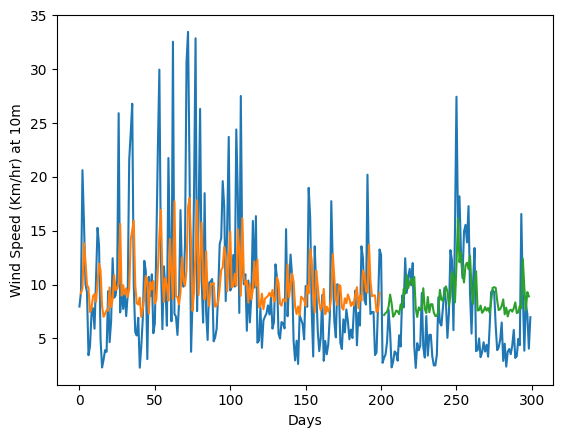

In [52]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Days')
plt.ylabel('Wind Speed (Km/hr) at 10m')
plt.show()